In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('Churn_Modelling.csv')

In [10]:
X = dataset.iloc[:,3:13]
y = dataset.iloc[:,13]

In [11]:
#Changing categorical features
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [12]:
X[:5]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [6]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [13]:
geography = pd.get_dummies(X["Geography"],drop_first=True);
gender = pd.get_dummies(X["Gender"],drop_first=True);

In [14]:
X = pd.concat([X,geography,gender],axis = 1)

In [16]:
X.drop(["Geography","Gender"],axis=1,inplace=True)

In [17]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [19]:
#Splitting into training and test data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [20]:
#Feature Scaling 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)


In [21]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

In [23]:
#Initialize the ANN
Classifier = Sequential()
#Adding the input layer
Classifier.add(Dense(units=6,kernel_initializer="he_uniform",activation="relu",input_dim=11))
#First hidden layer
Classifier.add(Dense(units=6,kernel_initializer="he_uniform",activation="relu"))
#Adding the output layer
Classifier.add(Dense(units=1,kernel_initializer="glorot_uniform",activation="sigmoid"))

In [24]:
Classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 6)                 72        
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [25]:
#Compiling the artificial Nueral network
Classifier.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [27]:
model = Classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=100)

Epoch 1/100
536/536 [==============================] - 2s 3ms/step - loss: 0.5714 - accuracy: 0.7070 - val_loss: 0.4624 - val_accuracy: 0.7963
Epoch 2/100
536/536 [==============================] - 2s 3ms/step - loss: 0.4422 - accuracy: 0.8031 - val_loss: 0.4346 - val_accuracy: 0.7974
Epoch 3/100
536/536 [==============================] - 2s 3ms/step - loss: 0.4193 - accuracy: 0.8110 - val_loss: 0.4180 - val_accuracy: 0.8035
Epoch 4/100
536/536 [==============================] - 2s 3ms/step - loss: 0.4024 - accuracy: 0.8237 - val_loss: 0.4050 - val_accuracy: 0.8129
Epoch 5/100
536/536 [==============================] - 1s 3ms/step - loss: 0.3890 - accuracy: 0.8341 - val_loss: 0.3948 - val_accuracy: 0.8171
Epoch 6/100
536/536 [==============================] - 1s 3ms/step - loss: 0.3787 - accuracy: 0.8405 - val_loss: 0.3874 - val_accuracy: 0.8247
Epoch 7/100
536/536 [==============================] - 2s 3ms/step - loss: 0.3711 - accuracy: 0.8421 - val_loss: 0.3825 - val_accuracy: 0.8289

In [28]:
y_pred = Classifier.predict(X_test)
y_pred = (y_pred>0.5)

In [30]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[1515,   80],
       [ 192,  213]])

In [34]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test,y_pred)
print(score*100)

86.4


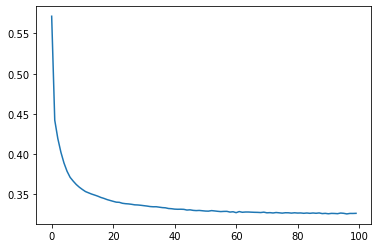

In [37]:
plt.plot(model.history['loss'])

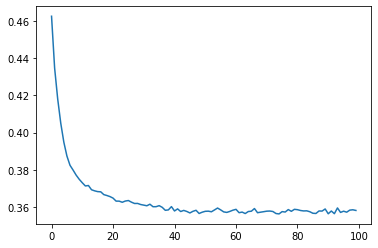

In [38]:
plt.plot(model.history['val_loss'])